## The Cuts

ARR will move up and ARR will move down. The goal is to provide context to the upward or downward trends. Imagine a waterfall chart. At the beginning of the waterfall, you have *period a*, and at the end of the waterfall you have *period b*. All the steps in the middle cut the upward and downward shifts in the data. A common term you will hear with this waterfall is an [*ARR Roll Forward*](https://analystanswers.com/roll-forward-in-accounting-definition-types-examples/).

Take a look at this example below:

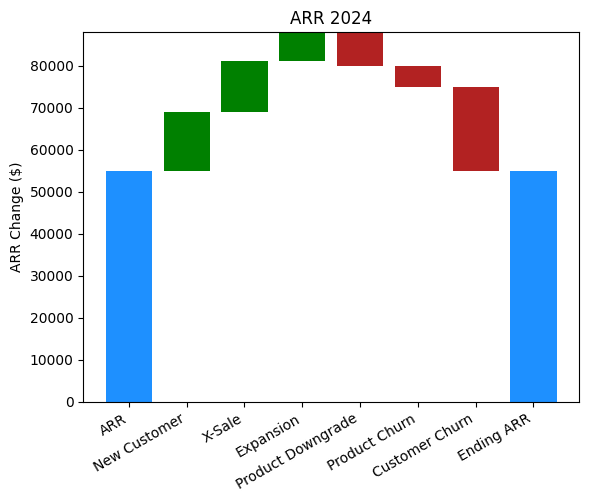

In [4]:
from matplotlib import pyplot as plt
import numpy as np

# Taken From:
# https://www.pythoncharts.com/python/waterfall-charts/#matplotlib-waterfall-charts

cuts = [
    "ARR",
    "New Customer",
    "X-Sale",
    "Expansion",
    "Product Downgrade",
    "Product Churn",
    "Customer Churn",
    "Ending ARR",
]

values = [55_000, 14_000, 12_000, 7_000, -8_000, -5_000, -20_000]

cumulative_values = np.cumsum(values)

fig, ax = plt.subplots()

# Plot the bars
for i in range(len(values)):
    if i == 0:
        color = "dodgerblue"
    elif values[i] >= 0:
        color = "green"
    else:
        color = "firebrick"
    ax.bar(
        cuts[i], values[i], bottom=cumulative_values[i] - values[i], color=color
    )

# Plot the last bar.
ax.bar(cuts[-1], cumulative_values[-1], color="dodgerblue")

ax.set_title("ARR 2024")
ax.set_ylabel("ARR Change ($)")

# Set x-axis labels to the middle of the bars
plt.xticks(rotation=30, ha="right")
plt.show()

You can see the beginning and ending amount, with the cuts inbetween explaining the difference. Those cuts and their definitions are not set and stone, but there are some general agreements across companies. **The important thing is consistency**. If the above chart's ending ARR is at the 55k mark for 2024. Then the 2025 version of this same chart must start at the last period's ending amount, so 55k.

<div class="alert alert-block alert-info">
The term <i><b>cut</b></i> is personal. I just like to use it. I don't really hear it anywhere else.
</div>

Here are some *what if* questions to ask yourself when building out the logic for your cuts.

- Did ARR go up?
- Did ARR go down?
- Did ARR go to zero?
- Did ARR come from zero?
- Was this ARR change because of the renewal?
- At what level did the ARR change?
    - Example 1, did ARR go to zero for the entire customer? Or just a product?
    - Example 2, did ARR go up because of the renewal? Or because of an agreement already in the contract?
- What is the audience asking and what are they trying understand?

<div class="alert alert-block alert-warning">
It will be tempting to utilize tags or fields in a source system as the determining way to categorize your ARR into different cuts. <b>Don't</b>. That is a losing battle. It will be extremely susceptible to errors and will never tie out. The change in ARR should be the basis for your cuts.
</div>

<div class="alert alert-block alert-info">
At this stage of your ARR journey, it's important to recognize who your audience is and what are they asking. Don't jump into a waterfall with a 12 different categories, if your ARR calc isn't even trusted yet. Start small and cater to what the audience wants and needs. A board member often wants the high level, while your manager's probably want as much detail as you can give them.
</div>

<div class="alert alert-block alert-info">
These <i><b>cuts</b></i> are where the real discovery happens, which implies a change for us. Until this point, everything has really been at the table level. The ARR calc is a measurement built into our customer cube. The next step is all about how we <b><i>look</b></i> at it.
</div>

### Up For Renewal

*Up for Renewal* is pretty straight forward and pretty pivotal in an ARR analysis. The definition is in the name. If the contract were to renew with the same amount, how much would it be? This measure is only useful when viewed with the context of time. When is the contract up for renewal? A $10k contract from January 1st 2024 to December 31st 2024 will have 10k *up for renewal* on January 1st 2025, the very next day after the end date.

Common questions will look like this, "How much ARR is up for renewal in January 2025?" and then "How did we do with that cohort of renewals?".

Let's see why it's important:

In [5]:
from arr import Contract, ContractHeader, ContractLine
from datetime import date

import pandas as pd

start = date(2024, 1, 1)
end = date(2025, 12, 31)

con1 = Contract(
    1,
    ContractHeader(15_000, date(2024, 1, 1), date(2025, 12, 31)),
    [
        ContractLine(5_000, date(2024, 1, 1), date(2024, 12, 31), "SaaS", True),
        ContractLine(10_000, date(2025, 1, 1), date(2025, 12, 31), "SaaS", True),
    ],
    "Customer1",
)

con2 = Contract(
    2,
    ContractHeader(5_000, date(2024, 1, 1), date(2024, 12, 31)),
    [ContractLine(5_000, date(2024, 1, 1), date(2024, 12, 31), "SaaS", True)],
    "Customer2",
)

con3 = Contract(
    3,
    ContractHeader(10_000, date(2025, 1, 1), date(2025, 12, 31)),
    [ContractLine(10_000, date(2025, 1, 1), date(2025, 12, 31), "SaaS", True)],
    "Customer2",
)

print(
    "Two customers, w/ the same change in ARR over time, but two completely different stories...\n"
)
print(con1, con2, con3, sep="-" * 60 + "\n")

pd.concat(
    [con1.to_annualize_df(), con2.to_annualize_df(), con3.to_annualize_df()]
).groupby("customer").sum()

Two customers, w/ the same change in ARR over time, but two completely different stories...

                         Customer1                          
             Contract #1 - $15,000 - 2024-01-01             
                  2024-01-01 - 2025-12-31                   
************************************************************
product	start date	end date	amount	renewable
************************************************************
SaaS	2024-01-01	2024-12-31	$5,000	True
SaaS	2025-01-01	2025-12-31	$10,000	True
************************************************************
------------------------------------------------------------
                         Customer2                          
             Contract #2 - $5,000 - 2024-01-01              
                  2024-01-01 - 2024-12-31                   
************************************************************
product	start date	end date	amount	renewable
************************************************************
SaaS	2

ARR                                                         \
period    2024-01-31 2024-02-29 2024-03-31 2024-04-30 2024-05-31 2024-06-30   
customer                                                                      
Customer1     5000.0     5000.0     5000.0     5000.0     5000.0     5000.0   
Customer2     5000.0     5000.0     5000.0     5000.0     5000.0     5000.0   

                                                                             \
period    2024-07-31 2024-08-31 2024-09-30 2024-10-31 2024-11-30 2024-12-31   
customer                                                                      
Customer1     5000.0     5000.0     5000.0     5000.0     5000.0     5000.0   
Customer2     5000.0     5000.0     5000.0     5000.0     5000.0     5000.0   

                                                                             \
period    2025-01-31 2025-02-28 2025-03-31 2025-04-30 2025-05-31 2025-06-30   
customer                                                                      
Customer1    10000.0    10000.0    10000.0    10000.0    10000.0    10000.0   
Customer2    10000.0    10000.0    10000.0    10000.0    10000.0    10000.0   

                                                                             
period    2025-07-31 2025-08-31 2025-09-30 2025-10-31 2025-11-30 2025-12-31  
customer                                                                     
Customer1    10000.0    10000.0    10000.0    10000.0    10000.0    10000.0  
Customer2    10000.0    10000.0    10000.0    10000.0    10000.0    10000.0

Both customers had their ARR increase 5k in January 2025. But `Customer1` increased because of a contractual agreement to ramp up the product by 5k. `Customer2` increased by 5k due to the renewal contract.

Take a look at another reason why up for renewal is so important.

<div class="alert alert-block alert-info">
<b>Scenario:</b></br>
You are manager of a 10 person renewals team. Your team is responsible for renewing all ARR contracts. 10 million total ARR spread evenly for each team member to be responsible for. Easy enough, that's 1 million that each individual member will need to renew. In a perfect world that would be 250k each quarter for each team member. Here's the catch, contracts are <i>never</i> that evenly split, imagine 50% of ARR in the one individual's book of business due in Q1, 10% in Q2, 30% in Q3, and 10% in Q4.

<b>Question:</b></br>
For that team member, would you comp them based on how the 1 million book ended every quarter? Or comp them based on the percentage that is actually due in the period? So 500k Q1, 100k Q2, 300k Q3, and 100k Q4.
</div>

I would choose the latter. I want to put the incentive closer to what is actionable. In Q2, if I was comping the individual off the first option. They could lose all 100k of their contracts and still retain 90% of their ARR. No thank you. I'm not alone in this thought. The **Gross Renewal Rate** reflects this principal and is a very popular metric amoung leadership in organizations and boards. They want to know "Of what was up for renewal in the period, what was the outcome?". We'll dive into rates later, but I wanted to call it out.

#### Calculating Up for Renewal

It's pretty straight forward when looking at Contracts individually, but can get a bit tricky in aggregate. Up for renewal over time is often the denominator of many of your *rate* calculations.

In [6]:
from data import CONTRACTS
from arr import annualize_df

df = CONTRACTS

df

,id,customer,header.amount,header.start_date,header.end_date,header.booking_date,line.amount,line.start_date,line.end_date,line.product,line.renewable
0,293,Meezzy,88000,2025-07-08,2026-07-07,2025-07-08,25000,2025-07-08,2026-07-07,ERP,True
1,293,Meezzy,88000,2025-07-08,2026-07-07,2025-07-08,12000,2025-07-08,2026-07-07,CPQ,True
2,293,Meezzy,88000,2025-07-08,2026-07-07,2025-07-08,7500,2025-07-08,2026-07-07,DevOps,True
3,293,Meezzy,88000,2025-07-08,2026-07-07,2025-07-08,13000,2025-07-08,2026-07-07,LMS,True
4,293,Meezzy,88000,2025-07-08,2026-07-07,2025-07-08,6000,2025-07-08,2026-07-07,IAM,True
...,...,...,...,...,...,...,...,...,...,...,...
1304,124,Nlounge,42000,2025-02-17,2025-08-16,2025-02-17,7500,2025-02-17,2025-08-16,DevOps,True
1305,124,Nlounge,42000,2025-02-17,2025-08-16,2025-02-17,6000,2025-02-17,2025-08-16,IAM,True
1306,124,Nlounge,42000,2025-02-17,2025-08-16,2025-02-17,6500,2025-02-17,2025-08-16,SCM,True
1307,124,Nlounge,42000,2025-02-17,2025-08-16,2025-02-17,12000,2025-02-17,2025-08-16,CPQ,True


## TODO: continue up for renewal build out